In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# this line is not required for running this
# script in a .py file.
import os
os.chdir('./..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from feature_engine.imputation import DropMissingData, MeanMedianImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# importing local modules
from feature_engineering import config

In [4]:
data = pd.read_csv(config.filepath, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
# naming the columns
data.columns = [f'A{i}' for i in range(1, 17)]
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
# the missing values in the dataset has been registered as a ?.
for col in data.columns:
    print(f'the column name is: {col}')
    print(f'the datatype of the column is: {data[col].dtypes}')
    print(data[col].unique())
    print('\n\n')

the column name is: A1
the datatype of the column is: object
['b' 'a' '?']



the column name is: A2
the datatype of the column is: object
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.1

In [8]:
# the datatypes of each column
data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [9]:
# replace the missing values (?) with np.nan
data = data.replace('?', np.nan)
for col in data.columns:
    print(f'the column name is: {col}')
    print(f'the datatype of the column is: {data[col].dtypes}')
    print(data[col].unique())
    print('\n\n')

the column name is: A1
the datatype of the column is: object
['b' 'a' nan]



the column name is: A2
the datatype of the column is: object
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' nan '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.1

In [10]:
# converting columns A2 and A14 as floats
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A2'].astype('float')
data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [11]:
# encode the target variable as binary
print("before encoding the target variable as binary")
data['A16'].unique()
data['A16'] = data['A16'].map({'+':1, '-':0})
print("after encoding the target variable as binary")
data['A16'].unique()

before encoding the target variable as binary


array(['+', '-'], dtype=object)

after encoding the target variable as binary


array([1, 0])

In [12]:
# rename the target variable
data.rename(columns={'A16':'target'}, inplace=True)
print(data.columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'target'],
      dtype='object')


In [13]:
# introducing missing values at random places in four variables
# that doesn't have any missing values
random.seed(42)
values = list(set([random.randint(0, len(data)) for _ in range(0, 100)]))
data.loc[values, ['A3', 'A8', 'A9', 'A10']] = np.nan

In [14]:
data.to_csv('./feature_engineering/data/credit_approval/credit_approval_uci.csv', index=False, index_label=False)

## 1) removing observations with missing data:

<Axes: >

Text(0, 0.5, 'proportion of missing data')

Text(0.5, 1.0, 'proportion of missing data per variable')

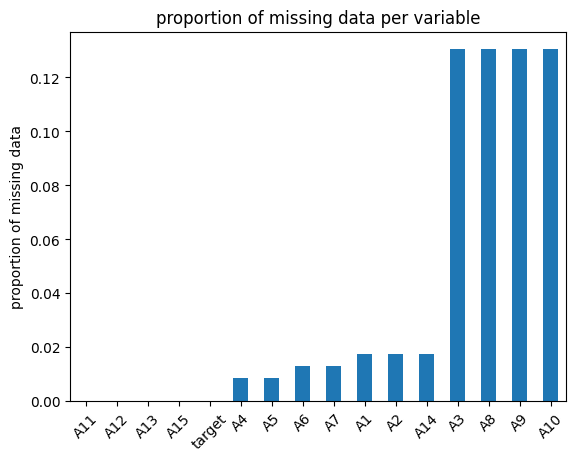

In [15]:
# plotting the proportion of missing values in each variable.
data.isnull().mean(axis=0).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('proportion of missing data')
plt.title('proportion of missing data per variable')

<Axes: >

Text(0, 0.5, 'proportion of missing data')

Text(0.5, 1.0, 'proportion of missing data per variable')

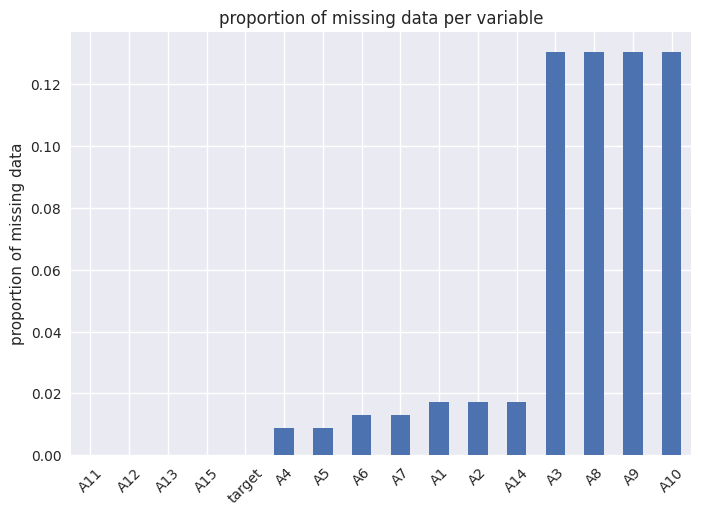

In [16]:
with plt.style.context('seaborn'):
    data.isnull().mean(axis=0).sort_values(ascending=True).plot.bar(rot=45)
    plt.ylabel('proportion of missing data')
    plt.title('proportion of missing data per variable')

In [17]:
print(f'length of the data before removing samples with one or more missing values: {len(data)}')
data_cca = data.dropna(how='any') # cca stands for complete case analysis
print(f'length of the data after removing samples with one or more missing values: {len(data_cca)}')

length of the data before removing samples with one or more missing values: 690
length of the data after removing samples with one or more missing values: 570


In [18]:
# removing samples with any missing values using a library called feature-engine
cca = DropMissingData(variables=None, missing_only=True)
cca.fit(data)

# list of variables with missing data
cca.variables_

# remove samples with missing data in any feature
data_cca = cca.transform(data)
print(f'the length of the data after dropping missing values: {len(data_cca)}')

DropMissingData()

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A14']

the length of the data after dropping missing values: 570


## 2) mean and median imputation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=42)

In [24]:
numerical_vars = X_train.select_dtypes(exclude='O').columns.tolist()
print(f'numerical variables are: {numerical_vars}')

numerical variables are: ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
